<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#def-prim(df,output,variable_names,population=0.25,peeling=0.05,pasting=0.001):" data-toc-modified-id="def-prim(df,output,variable_names,population=0.25,peeling=0.05,pasting=0.001):-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>def prim(df,output,variable_names,population=0.25,peeling=0.05,pasting=0.001):</a></span></li></ul></li></ul></li><li><span><a href="#essai-git" data-toc-modified-id="essai-git-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>essai git</a></span></li></ul></li></ul></div>

In [ ]:
# prim in python

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [180]:
data=pd.read_csv("dataquantmetry.csv",sep=",",encoding="ISO-8859-1")
        

In [181]:
data.columns.tolist();

In [70]:
data.head(4)

,Nº Hoja de recogida,X69_Opérateur,X52_fecha hora moldeo,X55_Nº de huella,X58_Humedad en tolva,X4_Velocidad de inyección,X16_Postpresión,X22'_Fecha fabricación mezcla,X25_CP : Carga a la rotura (Mpa) > 8.5,X26_CP : Alargamiento a la rotura (%) >350,...,X72_Temperarura agua H31x,X73_Temperarura agua H32x,Température eau 1,Température eau 2,lot de mélanges,test slabs,temps entre la fab et la prod,nb jrs entre la fab et la moulage,PostPression binaire,Jour moulage
0,25,Fco Nevado,11/04/2012 05:12,3,0.04,179.4,95.0,40976,8.8,465.0,...,33.2,37.6,33.2,37.6,1,1,33.682639,33.182639,95,3
1,25,Fco Nevado,11/04/2012 05:12,4,0.04,179.4,95.0,40976,8.8,465.0,...,33.2,37.6,37.6,33.2,1,1,33.682639,33.182639,95,3
2,29,J. Luis Cabeza,11/04/2012 13:24,3,0.02,177.0,95.1,40976,8.8,465.0,...,33.6,38.0,33.6,38.0,1,1,34.024306,33.524306,95,3
3,29,J. Luis Cabeza,11/04/2012 13:24,4,0.02,177.0,95.1,40976,8.8,465.0,...,33.6,38.0,38.0,33.6,1,1,34.024306,33.524306,95,3


#### def prim(df,output,variable_names,population=0.25,peeling=0.05,pasting=0.001):
    X=df[variable_names]
    new_mean=df[output].mean()
    number_points=df.shape[0]
    
    
    while population<df.shape[0]/number_points:
        box_average=[]
        for var in list(X):
            box_average.append(df[df[var]<(1-peeling)*(df[var].max())][output].mean())
            i=box_average.index(max(box_average))
            which_variable=list(X)[i]
            
            if df[output].mean()<df[df[which_variable]<(1-peeling)*(df[which_variable].max())][output].mean(): 
                df=df[df[which_variable]<(1-peeling)*(df[which_variable].max())]
                #else prim(df,output,variable_names,population=0.25,peeling=0.005,pasting=0.001)
            elif df[output].mean()<df[df[which_variable]<(1-3*peeling)*(df[which_variable].max())][output].mean(): 
                df=df[df[which_variable]<(1-3*peeling)*(df[which_variable].max())]
            else:
                break
                
    lower_bound=df[variable_names].min(axis=0)
    upper_bound=df[variable_names].max(axis=0)
    
        
    #return(df[variable_names],df[output],new_mean,df[output].mean(),df.shape[0],number_points,lower_bound,upper_bound) 
    return(lower_bound,upper_bound) 
        

In [182]:
def prim(df,output,variable_names,population=0.1,peeling=0.0005,pasting=0.001):
    X=df[variable_names]
    new_mean=df[output].mean()
    number_points=df.shape[0]
    list_peeled=[]
    dataset=[]
    
    while population<df.shape[0]/number_points:
        box_average=[]
        for var in list(X):
            box_average.append(df[df[var]>(1+peeling*(df[var].max()-df[var].min()))*(df[var].min())][output].mean()) #add all the means regarding the varible being peeled
            box_average.append(df[df[var]<(1-peeling)*(df[var].max()-df[var].min())][output].mean())
        
        i=box_average.index(max(box_average))   #pick the best
        which_variable=list(X)[i//2]
        list_peeled.append(which_variable)
        
        if i%2==1:
            if df[output].mean()<df[df[which_variable]<(1-peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                df=df[df[which_variable]<(1-peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())]
                dataset.append(df)
            #else prim(df,output,variable_names,population=0.25,peeling=0.005,pasting=0.001)
            elif df[output].mean()<df[df[which_variable]<(1-3*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                df=df[df[which_variable]<(1-3*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())]
                dataset.append(df)
            else:
                break
        
        else:
            if df[output].mean()<df[df[which_variable]>(1+peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())][output].mean(): 
                df=df[df[which_variable]>(1+peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())]
                dataset.append(df)
            #else prim(df,output,variable_names,population=0.25,peeling=0.005,pasting=0.001)
            elif df[output].mean()<df[df[which_variable]>(1+3*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                df=df[df[which_variable]>(1+3*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())]
                dataset.append(df)
            else:
                break
    
    
    #dernier df de la liste (peel more or less)
    if 1.1*population<df[output].shape[0]/number_points:
        while 1.1*population<df.shape[0]/number_points:
            box_average=[]
            for var in list(X):
                box_average.append(df[df[var]>(1+10*peeling*(df[var].max()-df[var].min()))*(df[var].min())][output].mean()) #add all the means regarding the varible being peeled
                box_average.append(df[df[var]<(1-10*peeling)*(df[var].max()-df[var].min())][output].mean())
        
            i=box_average.index(max(box_average))   #pick the best
            which_variable=list(X)[i//2]
            list_peeled.append(which_variable)
        
            if i%2==1:
                if df[output].mean()<df[df[which_variable]<(1-10*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                    df=df[df[which_variable]<(1-10*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())]
                    dataset.append(df)
                #else prim(df,output,variable_names,population=0.25,peeling=0.005,pasting=0.001)
                elif df[output].mean()<df[df[which_variable]<(1-20*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                    df=df[df[which_variable]<(1-20*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())]
                    dataset.append(df)
                else:
                    break
        
            else:
                if df[output].mean()<df[df[which_variable]>(1+10*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())][output].mean(): 
                    df=df[df[which_variable]>(1+10*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())]
                    dataset.append(df)
            #else prim(df,output,variable_names,population=0.25,peeling=0.005,pasting=0.001)
                elif df[output].mean()<df[df[which_variable]>(1+30*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].max())][output].mean(): 
                    df=df[df[which_variable]>(1+30*peeling*(df[which_variable].max()-(df[which_variable].min())))*(df[which_variable].min())]
                    dataset.append(df)
                else:
                    break
        
        
    if (len(dataset)>1 and population>dataset[-1][output].shape[0]/number_points):
        df=dataset[-2]
        
        
        
        
                
    lower_bound=df[variable_names].min(axis=0)
    upper_bound=df[variable_names].max(axis=0)
    
        
    #return(list_peeled,new_mean,df[output].mean(),df.shape[0],number_points) 
    return(lower_bound,upper_bound) 
        

In [183]:
a=[].append(2)
a

In [193]:
prim(data,"count",[
 'holiday',
 'workingday',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'night',
 'morning',
 'afternoon',
 'afterwork',
 'evening',
 'winter',
 'spring',
 'summer',
 'autumn',
 'dayofweek',
 'beau_temps',
 'nuageux',
 'pluie_neige',
 'mauvais_temps',
 'timediff',
 ],population=0.01,peeling=0.0002)

(['afterwork', 'summer', 'workingday', 'holiday', 'holiday'],
 191.57413191254824,
 517.2025316455696,
 316,
 10886)

In [163]:
l, u = prim(data,"test slabs",["Température eau 1","Température eau 2"])

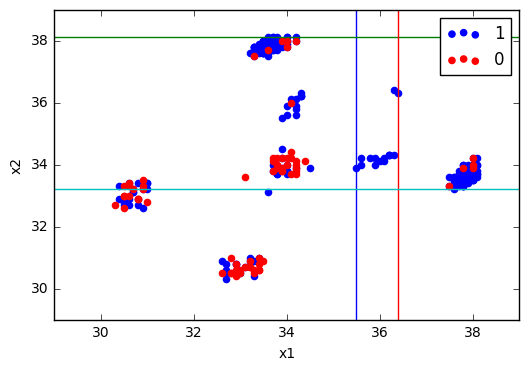

In [164]:
data0 = data[data['test slabs'] == 0]
data1 = data[data['test slabs'] == 1]


plt.scatter(data1["Température eau 1"], data1["Température eau 2"], label='1', marker='o', color='blue')
plt.scatter(data0["Température eau 1"], data0["Température eau 2"], label='0', marker='o', color='red')
plt.plot([l[0], l[0]], [20, 40])
plt.plot([20, 40], [u[0], u[0]])
plt.plot([u[1], u[1]], [20, 40])
plt.plot([20, 40], [l[1], l[1]])
plt.xlim(29, 39)
plt.ylim(29, 39)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

In [81]:
data.columns.tolist()

['Nº Hoja de recogida',
 'X69_Opérateur',
 'X52_fecha hora moldeo',
 'X55_Nº de huella',
 'X58_Humedad en tolva',
 'X4_Velocidad de inyección',
 'X16_Postpresión',
 "X22'_Fecha fabricación mezcla",
 'X25_CP : Carga a la rotura (Mpa) > 8.5',
 'X26_CP : Alargamiento a la rotura (%) >350',
 'X50_CP : Humedad (%)',
 'X17_CP : Viscosidad (Pa*s)',
 'X6_CR : Carga a la rotura (Mpa) > 8.5',
 'X2_CR : Alargamiento a la rotura (%)',
 'X20_CR : Modulo20',
 'X21_CR : Modulo100',
 'X24_CR : Modulo200',
 'X53_CR : humedad',
 'X28_CR : Viscosidad',
 'X5_Tasa de methylol de la resina (%)',
 'X61_Viscosidad del PP mezcla (g/10 min)',
 'X35_Fecha de caducidad',
 'X42_Tº secado entrada',
 "X42'_Tº secado salida",
 'X30_Indice de fluidez',
 'X60_Carrera de dosificación',
 'X57_Tiempo de dosificación',
 'X54_Contrapresíon',
 'X3_Tiempo inyección',
 'X29_Presión inyección',
 'X31_Volumen inyectado',
 'X15_Tiempo de postpresion',
 'X45_Cojin',
 'X64_Fuerza de cierre',
 'X66_Tiempo expulsión',
 'X67_Posición 

In [17]:
new_mean=data["test slabs"].mean()

In [19]:
number_points=data.shape[0]
box_average=[]

In [22]:
list(X)[1]

'Température eau 1'

In [ ]:
while 0.25<df.shape[0]/number_points:
    for var in list(X):
        box_average.append(df[df[var]<(1-peeling)*(df[var].max())][output].mean())
        i=box_average.index(max(box_average))
            
        which_variable=list(X)[i]
        
        df=df[df[which_variable]<(1-peeling)*(df[which_variable].max())]

## essai git

In [1]:
2+2

4